In [159]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import *
from sklearn.metrics import confusion_matrix
import seaborn as sns
#cross validation
from sklearn.model_selection import KFold
# fix random seed for reproducibility
seed=7
np.random.seed(seed)
var_w=lambda shape: initializers.RandomUniform(-0.5,0.5)

In [160]:
#méthode essai pour cross validation
# load pima indians dataset
dataset = pd.read_csv("D:/Cours Dauphine/S2/AFD/projet/codeSource/train_cap2018.csv", sep=",")
# split into input (X) and output (Y) variables
scaler = StandardScaler()
X=dataset.iloc[:,1:59].astype(float)
Y=dataset.iloc[:,59]
Y_c=Y

In [161]:
#Suppression des NaN
w = np.isnan(X)
X[w] = 0#X.mean() à changer
#Normalisation des données
scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.transform(X)
X_c=X
X, X_test, Y, Y_test = train_test_split(X, Y,test_size=0.33)

In [157]:
#Définition du modèle
def create_mdl():
    #création 
    model = Sequential()
    model.add(Dense(150, input_dim=58,kernel_initializer='normal', activation='relu'))#
    model.add(Dense(500, activation='relu'))
    model.add(Dense(6,kernel_initializer='normal', activation='softmax'))# a revoir la fct
    #compilation 
    sgd = SGD(lr=0.01)
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])#adamax
    return model

model=create_mdl()

    

In [158]:
#Pour encoder Y
encoder = LabelEncoder()
encoder.fit(Y)
#converti le Y de chaine de caractères à numérique
Y_numerique = encoder.transform(Y)
print(Y_numerique)
# convert integers to dummy variables (i.e. one hot encoded)
y_encode_binaire = np_utils.to_categorical(Y_numerique)#6
encodert = LabelEncoder()
encodert.fit(Y_test)
#converti le Y de chaine de caractères à numérique
Y_numerique_t = encodert.transform(Y_test)
# convert integers to dummy variables (i.e. one hot encoded)
y_encode_binaire_t = np_utils.to_categorical(Y_numerique_t)#6
historique=model.fit(X, y_encode_binaire, epochs=10, batch_size=30)


[2 1 0 ..., 0 0 0]
Epoch 1/10
18297/18297 [==============================] - 3s 183us/step - loss: 0.7010 - categorical_accuracy: 0.7329
Epoch 2/10
18297/18297 [==============================] - 3s 140us/step - loss: 0.5768 - categorical_accuracy: 0.7785
Epoch 3/10
18297/18297 [==============================] - 2s 136us/step - loss: 0.5438 - categorical_accuracy: 0.7909
Epoch 4/10
18297/18297 [==============================] - 3s 137us/step - loss: 0.5183 - categorical_accuracy: 0.8010
Epoch 5/10
18297/18297 [==============================] - 3s 149us/step - loss: 0.4989 - categorical_accuracy: 0.8081
Epoch 6/10
18297/18297 [==============================] - 2s 136us/step - loss: 0.4845 - categorical_accuracy: 0.8174
Epoch 7/10
18297/18297 [==============================] - 2s 131us/step - loss: 0.4719 - categorical_accuracy: 0.8175
Epoch 8/10
18297/18297 [==============================] - 2s 131us/step - loss: 0.4619 - categorical_accuracy: 0.8213
Epoch 9/10
18297/18297 [=============

dict_keys(['loss', 'categorical_accuracy'])


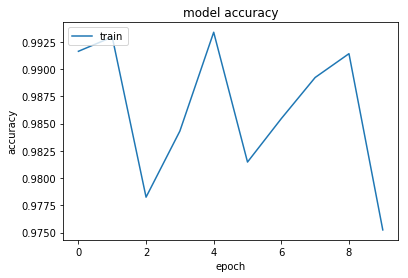

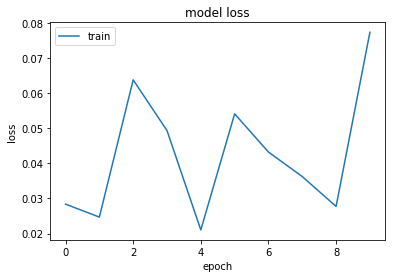

In [144]:
print(historique.history.keys())
# summarize history for accuracy
plt.plot(historique.history['categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historique.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [145]:
scores = model.evaluate(X, y_encode_binaire)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#print(scores)

18297/18297 [==============================] - 1s 62us/step

categorical_accuracy: 98.30%


(9013,)


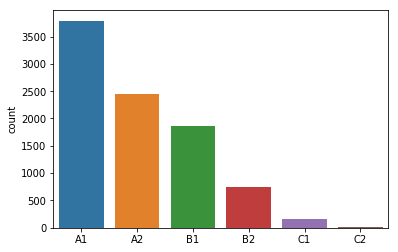

In [146]:
predictions = model.predict_classes(X_test)
classes = encoder.inverse_transform(predictions)

print(classes.shape)
sns.countplot(classes,label="Count")
plt.show()


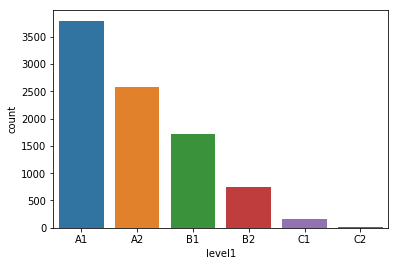

(9013,)

In [147]:
sns.countplot(Y_test,label="Count")
plt.show()
Y_test.shape

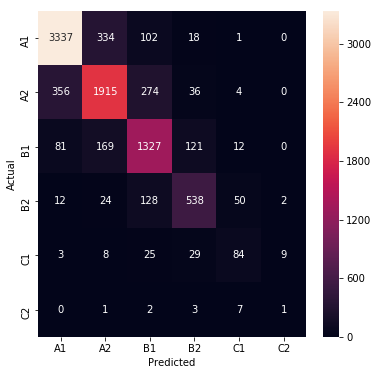

In [148]:
mat = confusion_matrix(Y_test, classes)
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(mat, annot=True, fmt='d',
            xticklabels=['A1','A2','B1','B2','C1','C2'], yticklabels=['A1','A2','B1','B2','C1','C2'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [167]:
#Cross validation algorithm 
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
for train_index, test_index in kfold.split(X_c, Y_c): 
    X_train, X_test = X_c[train_index], X_c[test_index]
    y_train, y_test = Y_c[train_index], Y_c[test_index]
    encoder = LabelEncoder()
    encoder.fit(y_train)
    Y_numerique = encoder.transform(y_train)
    y_encode_binaire = np_utils.to_categorical(Y_numerique)#6
    #test data
    encodert = LabelEncoder()
    encodert.fit(y_test)
    #converti le Y de chaine de caractères à numérique
    Y_numerique_t = encodert.transform(y_test)
    # convert integers to dummy variables (i.e. one hot encoded)
    y_encode_binaire_t = np_utils.to_categorical(Y_numerique_t)#6
    history=model.fit(X_train, y_encode_binaire, epochs=1, batch_size=30)
    

Epoch 1/1
24576/24576 [==============================] - 3s 140us/step - loss: 0.2922 - categorical_accuracy: 0.8853
Epoch 1/1
24578/24578 [==============================] - 3s 141us/step - loss: 0.2800 - categorical_accuracy: 0.8910
Epoch 1/1
24578/24578 [==============================] - 4s 143us/step - loss: 0.2770 - categorical_accuracy: 0.8910
Epoch 1/1
24579/24579 [==============================] - 3s 142us/step - loss: 0.2714 - categorical_accuracy: 0.8944
Epoch 1/1
24579/24579 [==============================] - 4s 143us/step - loss: 0.2607 - categorical_accuracy: 0.8994
Epoch 1/1
24579/24579 [==============================] - 4s 143us/step - loss: 0.2526 - categorical_accuracy: 0.9025
Epoch 1/1
24579/24579 [==============================] - 4s 150us/step - loss: 0.2479 - categorical_accuracy: 0.9031
Epoch 1/1
24580/24580 [==============================] - 4s 145us/step - loss: 0.2367 - categorical_accuracy: 0.9083
Epoch 1/1
24581/24581 [==============================] - 3s 130u

dict_keys(['loss', 'categorical_accuracy'])


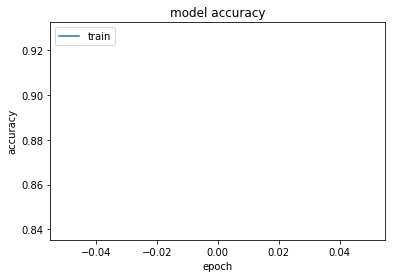

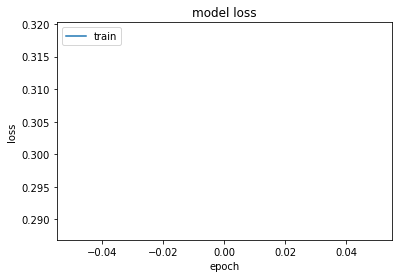

In [165]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()